In [1]:
install.packages("keras")


The downloaded binary packages are in
	/var/folders/9h/vzls18sn1pvgfwfymvybqkvw0000gn/T//RtmpzcigmB/downloaded_packages


In [2]:
library(keras)

In [3]:
install_keras()

Using existing virtualenv at  ~/.virtualenvs/r-tensorflow 
Upgrading pip ...
Upgrading wheel ...
Upgrading setuptools ...
Installing TensorFlow ...

Installation complete.



## 1. 리뷰
- Logistic Regression
    - x, w, b 실수
    - 범위: -무한대 ~ +무한대
    
- Regeression
- Classification
    - Binary
    - Muliclass
        - sigmoid(xw + b)
        - ŷ = Σ(wx + b)
        - ŷ = σ(wx + b)
- GLM

- - -

## 2. 인공신경망
- 인공신경망이란?
    - input : Balance(x1), Income(x2)
    - output : Default
    
    - Regression
        - 사진
        - 모든 네트워크를 짤 때 기본이 되는 모형
        
        - Filter를 씌우면 Regression 문제가 된다.
        
        - 만약에 회귀문제였는데 필터가 없었다.
        - 분류 문제에서는 sigmoid
        
    - 스프레드 시트
    
    - 0.01에서 논다면... 제곱하면 0.00001이 된다.
        - 사라져 버릴 수가 있다.
        - 1보다 작은 값을 제곱하면 엄청 작아지고, 1보다 큰 값을 제곱하면 엄청 커질 수 있다.
        - underflow(너무 작아지면 0으로 처리)가 일어나거나, overflow가 일어날 수 있다.
        
- 다른 기계를 하나 더 갖고 온다. (14:30)
    - 마찬가지로 기계도 income가 balance를 받는다.
    - 똑같은 기계이긴 기계인데
    - 행렬
    - h1(hidden 1) h2(hidden 2)라는 output을 input으로 생각해서
    - hi과 h2를 받아서 각각의 가중치를 기계에 넣는다.(19:40)
- filter를 씌우는 이유 : 확률이 0~1사이에 나와야해서
    - 맨 마지막 단계에만 sigmoid filter를 쓰면 된다.
- 모든 단계예 sigmoid filter를 쓰면 잘 안 되는 이유 (24:00)

- 모델이 함의하는 바는 무엇일까? (25:00)
    - Training을 처음에 시작할 떄,
    - 랜덤 혹은 0으로 설정해줬는데 Training을 거듭해가면서 parameter가 make sense한 방향으로 Training이 되었다.
    - 말이 되는 방향으로 Training이 되는 것은?
        - 처음 생각했던 logistic Regression은
            - w2가 양수였다 치면, 
            - default가 ...
            - 말이 안 되는 경우도 있다.

- ex) 이미지의 픽셀(28:25)
    - 
    
(29:30)
- 간단한 변수를 받아서 조금 더 복잡한
- 계층적으로 

- 넘버링 하는 방법 (32:00)
    -
    - tensor : 숫자들의 n(3, 4, 5)차원 배열로 이루어진 객체
    - tensorflow에서 말하는 tensor가 이 tensor다.
- 모델 트레이닝 (33:40)
    - loss
    - 회귀문제를(수치형 변수를 푸는 문제를) 풀고싶다면 filter를 뺀다. (34:00)
    - 분류문제는 filter를 넣어주면 된다.
    - 회귀를 잘 공부하면 분류 문제도 공짜로 먹을 수 있다.
    
- 되짚어보기 (34:50)
    - 1) Model의 구조를 특정한다.
        - 우리는 이런 식으로 모델을 사용할 거야
    - 2) cost를 계산한다.
        - parameter를 바꾸면 cost가 바뀌었다.
        - 이 모델을 결정하는 파라미터의 변수는 총 9개(w 6개 b 3개)
        - 특정 parameter를 늘렸는데 cost가 늘어났다면 해당 변수를 줄여줘야 한다.
        - Gradient로 지정하기로 함
        - 이 논리를 한 주롤 축약한 게 Gradient Descent다.

## 실습 (37:50)

In [4]:
library(ISLR)
str(Default)

'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...


In [5]:
sd(Default$income)
sd(Default$balance)

[1] 13336.64

[1] 483.715

In [8]:
## 실습 (37:50)
## income, balance를 받아서 default 예측
## input으로 두 개를 받아야 함

## sigmoid filter
sigmoid <- function(x){
    
    y <- exp(x) / (1 + exp(x))
    
    return(y)
}

## logistic regression code
Machine <- function(x1, x2, w1, w2, b){

    y <- sigmoid(x1 * w1 + x2 * w2 + b)
    
    return(y)
}

## cost (41:40)
Cost <- function(x1, x2, y, w1, w2, b){

    y_pred <- Machine(x1, x2, w1, w2, b)
    
    loss <- -(y * log(y_pred) + (1-y) * log(1-y_pred)) # 예측된 y의 값은 vector, loss도 vector

    cost <- mean(loss) ## 평균내기
    
    return(cost)
}

## 계산된 cost를 기반으로 parameter를 update를 시켜주는 함수가 필요함(44:00)
## 경사하강법
Train <- function(x1, x2, y, w1, w2, b, step){
    
    ## 눈치가 빠른 사람이라면... 계산을 (48:30)
    ## 현재의 cost 값
    current <- Cost(x1, x2, y, w1, w2, b)
    
    dw1 <- (Cost(x1, x2, y, w1 + 0.0001, w2, b) - current) / 0.0001 # 집중(45:10)
    # w1이 변했을 때, cost의 변화량 측정
    # 값이 +면... w1양의 양수인데 전체 양이 양수면 w1을 줄여야 한다. 반대의 경우면 줄여야 한다.
    dw2 <- (Cost(x1, x2, y, w1, w2 + 0.0001, b) - current) / 0.0001
    db <- (Cost(x1, x2, y, w1, w2, b + 0.0001) - current) / 0.0001
    
    w1 <- w1 - step * dw1
    w2 <- w2 - step * dw2
    b <- b - step * db
    
    return(c(w1, w2, b)) 
}


# 경사하강법에서 변수들이 노는 크기가 다르면 다루기 힘들다 (51:00)
# 
x1 <- Default$balance / sd(Default$balance) 
x2 <- Default$income / sd(Default$income)
y <- ifelse(Default$default == "Yes", 1, 0)

w1 <- 0
w2 <- 1
b <- 0.5

# 58:00~
cost <- NULL # 추가 1

for (i in 1:100){
    
    cost <- append(cost, Cost(x1, x2, y, w1, w2, b)) # 추가 2, 현재 parameter setting으로 원래의 cost 값 뒤에 붙여서 새롭게 cost라고 정의해라... 원소가 100개인 vector가 됨
    
    temp <- Train(x1, x2, y, w1, w2, b, 0.5)
    
    w1 <- temp[1]
    w2 <- temp[2]
    b <- temp[3]   
}

- update를 반복하면서 cost 함수의 값을 추적하면 된다.(56:00)
- 코드 리뷰(56:50)

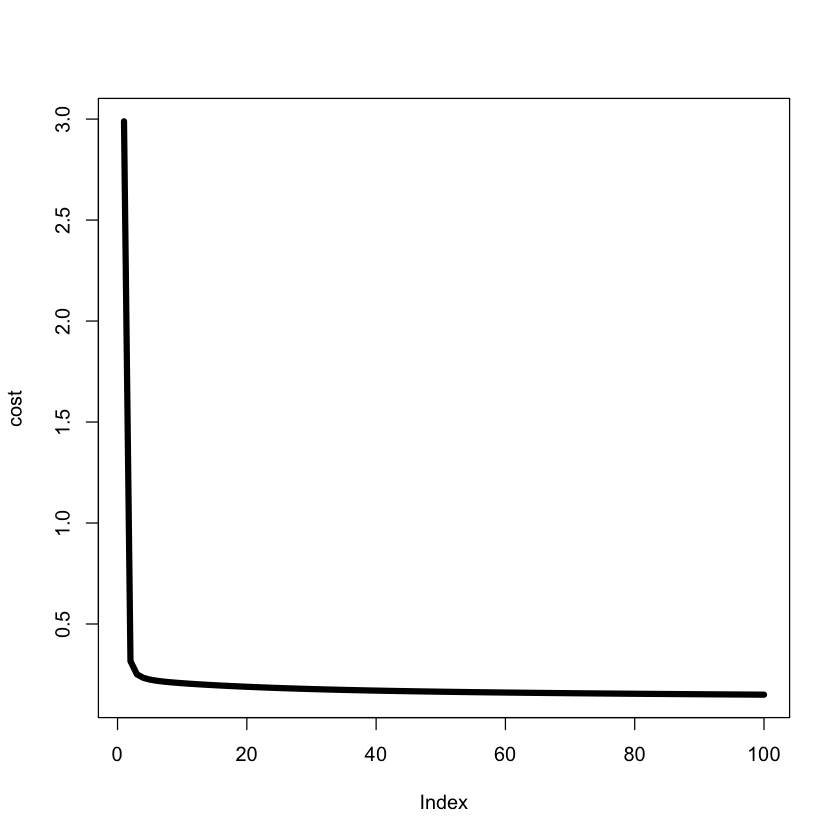

In [10]:
plot(cost, type = 'l', lwd = 5) # dot(.)이 아닌 line(l)으로 설정

In [11]:
cost

[1] 2.9888643 0.3161620 0.2508234 0.2333663 0.2247302 0.2192726 0.2152788
  [8] 0.2120647 0.2093122 0.2068582 0.2046129 0.2025239 0.2005594 0.1986994
 [15] 0.1969303 0.1952430 0.1936307 0.1920883 0.1906115 0.1891967 0.1878409
 [22] 0.1865412 0.1852949 0.1840996 0.1829527 0.1818521 0.1807954 0.1797807
 [29] 0.1788058 0.1778688 0.1769678 0.1761011 0.1752669 0.1744636 0.1736896
 [36] 0.1729435 0.1722238 0.1715293 0.1708586 0.1702106 0.1695841 0.1689781
 [43] 0.1683915 0.1678233 0.1672728 0.1667389 0.1662208 0.1657179 0.1652294
 [50] 0.1647545 0.1642927 0.1638433 0.1634058 0.1629795 0.1625640 0.1621587
 [57] 0.1617633 0.1613772 0.1610001 0.1606315 0.1602711 0.1599184 0.1595733
 [64] 0.1592353 0.1589041 0.1585795 0.1582612 0.1579489 0.1576423 0.1573413
 [71] 0.1570456 0.1567551 0.1564694 0.1561884 0.1559120 0.1556399 0.1553720
 [78] 0.1551081 0.1548481 0.1545918 0.1543392 0.1540900 0.1538441 0.1536015
 [85] 0.1533619 0.1531254 0.1528918 0.1526610 0.1524329 0.1522074 0.1519844
 [92] 0.1517639 0.1515458 0.1513299 0.1511163 0.1509048 0.1506955 0.1504881
 [99] 0.1502827 0.1500792

- (1시간 3분) 모델의 capa
- 0.15보다 작아지는데 그게 좋은 거냐? 그건 모른다
    - validation set을 가지고 와서 검증 절차를 거쳐야 한다.
- 우리가 만든 건 logistic regression이다.

- 관측을 다 해줘야한다.
- (1시간 5분) 맨 위로 올라가즈아
    - 올라가지 말고 바로 아래에 코드 복붙

In [22]:
## income, balance를 받아서 default 예측
## input으로 두 개를 받아야 함

## relu filiter
## 0과 비교만하면 되니까 비용이 엄청 싸고, sigmoid보다 학습도 빨리 된다. 그래서 여러 가지 이유로 relu filter를 쓴다.
relu <- function(x){
    
    y <- pmax(X,0)
    
    return(y)
}

## sigmoid filter
sigmoid <- function(x){
    
    y <- exp(x) / (1 + exp(x))
    
    return(y)
}

## logistic regression code
Machine <- function(x1, x2,
                    w1_11, w1_12, b1_1,
                    w1_21, w1_22, b1_2,
                    w2_11, w2_12, b2_1){ # w1_11 = 첫번째 층에 있는 첫번째 기계의 첫번째 parameter

#     h1 <- sigmoid(x1 * w1_11 + x2 * w1_12 + b1_1) # 선형대수가 필요한 이유 (1시간 8분)... 간결하게 하기 위해
#     h2 <- sigmoid(x1 * w1_21 + x2 * w1_22 + b1_2)
    h1 <- relu(x1 * w1_11 + x2 * w1_12 + b1_1) # 선형대수가 필요한 이유 (1시간 8분)... 간결하게 하기 위해
    h2 <- relu(x1 * w1_21 + x2 * w1_22 + b1_2)
    
    # h1과 h2를 받아서 y_probality(predic_y)
    y_hat <- sigmoid(h1 * w2_11 + h2 * w2_12 + b2_1)
    return(y_hat)
}

## cost (41:40)
Cost <- function(x1, x2, y,
                 w1_11, w1_12, b1_1,
                 w1_21, w1_22, b1_2,
                 w2_11, w2_12, b2_1){

    y_hat_pred <- Machine(x1, x2, w1_11, w2_12, b1_1,
                              w1_21, w1_22, b1_2,
                              w2_11, w2_12, b2_1)
    
    loss <- -(y * log(y_hat_pred) + (1-y) * log(1-y_hat_pred)) # 예측된 y의 값은 vector, loss도 vector

    cost <- mean(loss) ## 평균내기
    
    return(cost)
}

## 계산된 cost를 기반으로 parameter를 update를 시켜주는 함수가 필요함
## 경사하강법
Train <- function(x1, x2, y,
                  w1_11, w1_12, b1_1,
                  w1_21, w1_22, b1_2,
                  w2_11, w2_12, b2_1,
                  step){
    
    ## 눈치가 빠른 사람이라면... 계산을 (48:30)
    ## 현재의 cost 값
    current <- Cost(x1, x2, y,
                    w1_11, w1_12, b1_1,
                    w1_21, w1_22, b1_2,
                    w2_11, w2_12, b2_1 
                   )
    
    # (1시간 15분 20초)
    # 1시간 17분 back propagation ... 미분이 필요함!
    dw1_11 <- (Cost(x1, x2, y,
                 w1_11 + 0.0001, w1_12, b1_1,
                 w1_21, w1_22, b1_2,
                 w2_11, w2_12, b2_1) - current) / 0.0001
       
    dw1_12 <- (Cost(x1, x2, y,
             w1_11, w1_12 + 0.0001, b1_1,
             w1_21, w1_22, b1_2,
             w2_11, w2_12, b2_1) - current) / 0.0001

    
    db1_1 <- (Cost(x1, x2, y,
             w1_11, w1_12, b1_1 + 0.0001,
             w1_21, w1_22, b1_2,
             w2_11, w2_12, b2_1) - current) / 0.0001

    dw1_21 <- (Cost(x1, x2, y,
             w1_11, w1_12, b1_1,
             w1_21 + 0.0001, w1_22, b1_2,
             w2_11, w2_12, b2_1) - current) / 0.0001

    
    dw1_22 <- (Cost(x1, x2, y,
             w1_11, w1_12, b1_1,
             w1_21, w1_22 + 0.0001, b1_2,
             w2_11, w2_12, b2_1) - current) / 0.0001

    db1_2 <- (Cost(x1, x2, y,
             w1_11, w1_12, b1_1,
             w1_21, w1_22, b1_2 + 0.0001,
             w2_11, w2_12, b2_1) - current) / 0.0001

    dw2_11 <- (Cost(x1, x2, y,
             w1_11, w1_12, b1_1,
             w1_21, w1_22, b1_2,
             w2_11 + 0.0001, w2_12, b2_1) - current) / 0.0001

    dw2_12 <- (Cost(x1, x2, y,
             w1_11, w1_12, b1_1,
             w1_21, w1_22, b1_2,
             w2_11, w2_12 + 0.0001, b2_1) - current) / 0.0001

    db2_1 <- (Cost(x1, x2, y,
             w1_11, w1_12, b1_1,
             w1_21, w1_22, b1_2,
             w2_11, w2_12, b2_1 + 0.0001) - current) / 0.0001

    
    w1_11 <- w1_11 - step * dw1_11
    w1_12 <- w1_12 - step * dw1_12
    b1_1  <- b1_1 - step * db1_1
    
    w1_21 <- w1_21 - step * dw1_21
    w1_22 <- w1_22 - step * dw1_22
    b1_2  <- b1_2 - step * db1_2
    
    
    w2_11 <- w2_11 - step * dw2_11
    w2_12 <- w2_12 - step * dw2_12
    b2_1  <- b2_1 - step * db2_1
    
    return(c(w1_11, w1_12, b1_1,
             w1_21, w1_22, b1_2,
             w2_11, w2_12, b2_1)) 
}


# 경사하강법에서 변수들이 노는 크기가 다르면 다루기 힘들다 (51:00)
# 
x1 <- Default$balance / sd(Default$balance) 
x2 <- Default$income / sd(Default$income)
y <- ifelse(Default$default == "Yes", 1, 0)

w1_11 <- rnorm(1) * 0.01
w1_12 <- rnorm(1) * 0.01
b1_1 <- 0

w1_21 <- rnorm(1) * 0.01
w1_22 <- rnorm(1) * 0.01
b1_2 <- 0

w2_11 <- rnorm(1) * 0.01
w2_12 <- rnorm(1) * 0.01
b2_1 <- 0

cost <- NULL # 추가 1 (58:00~)

for (i in 1:100){
    
    cost <- append(cost, Cost(x1, x2, y,
                              w1_11, w1_12, b1_1,
                              w1_21, w1_22, b1_2,
                              w2_11, w2_12, b2_1)) # 추가 2, 현재 parameter setting으로 원래의 cost 값 뒤에 붙여서 새롭게 cost라고 정의해라... 원소가 100개인 vector가 됨
    
    temp <- Train(x1, x2, y, w1_11, w1_12, b1_1,
                             w1_21, w1_22, b1_2,
                             w2_11, w2_12, b2_1, 0.5)
    
    
    
    w1_11 <- temp[1]
    w1_12 <- temp[2]
    b1_1 <- temp[3]
    w1_21 <- temp[4]
    w1_22 <- temp[5]
    b1_2 <- temp[6]
    w2_11 <- temp[7]
    w2_12 <- temp[8]
    b2_1 <- temp[9]
    }

In [23]:
cost

[1] 0.6894464 0.5468314 0.4563223 0.3935968 0.3478756 0.3134061 0.2867606
  [8] 0.2657500 0.2489079 0.2352167 0.2239503 0.2145789 0.2067087 0.2000422
 [15] 0.1943511 0.1894583 0.1852248 0.1815401 0.1783159 0.1754807 0.1729760
 [22] 0.1707542 0.1687754 0.1670068 0.1654207 0.1639937 0.1627061 0.1615410
 [29] 0.1604841 0.1595229 0.1586467 0.1578462 0.1571134 0.1564411 0.1558232
 [36] 0.1552542 0.1547293 0.1542443 0.1537953 0.1533791 0.1529926 0.1526331
 [43] 0.1522982 0.1519859 0.1516941 0.1514211 0.1511653 0.1509254 0.1506999
 [50] 0.1504877 0.1502878 0.1500992 0.1499209 0.1497522 0.1495923 0.1494406
 [57] 0.1492964 0.1491591 0.1490282 0.1489033 0.1487838 0.1486693 0.1485595
 [64] 0.1484540 0.1483525 0.1482546 0.1481601 0.1480687 0.1479801 0.1478942
 [71] 0.1478106 0.1477292 0.1476499 0.1475723 0.1474964 0.1474219 0.1473488
 [78] 0.1472768 0.1472059 0.1471359 0.1470666 0.1469980 0.1469299 0.1468623
 [85] 0.1467950 0.1467279 0.1466609 0.1465939 0.1465269 0.1464597 0.1463922
 [92] 0.1463244 0.1462561 0.1461873 0.1461179 0.1460479 0.1459770 0.1459053
 [99] 0.1458327 0.1457591

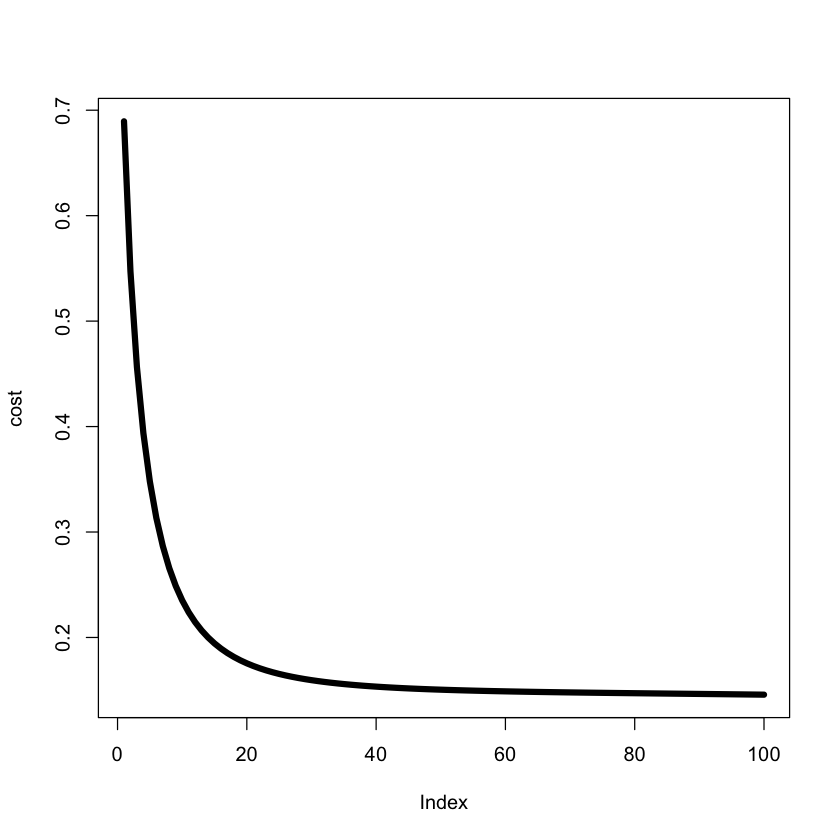

In [24]:
plot(cost, type = 'l', lwd = 5) # dot(.)이 아닌 line(l)으로 설정

- 지금 한 것은 h1과 h2를 받아서 최종적으로 output을 뱉어주는 2번째 층의 기계가 필요하다(1시간 9분)
- 그걸 실제로 y_prop
- 우리가 만든 코드 (1시간 26분)

## 초기값 설정 이슈
- cost가 0.15 에서 0.14로 수렴하고 있다.
- 근데 아주 중요한 문제가 있다. (1시간 36분)
    - '시작하는 값을 어떻게 해야할까'에 대한 문제
    - 0으로 하면 안 된다.
    - 똑같은 값에서 시작하면 안 된다.
        - 대칭성을 띄는 기계 1과 기계 2의 cost가 동일하게 늘어나기 때문에
        - 똑같은 기계 2개가 있는 꼴이다.
            - w1-11 = w1_21
        - 그래서 설정할 때, random initialization
        
```r
w1_11 <- rnorm(1) * 0.01
w1_12 <- rnorm(1) * 0.01
b1_1 <- 0

w1_21 <- rnorm(1) * 0.01
w1_22 <- rnorm(1) * 0.01
b1_2 <- 0

w2_11 <- rnorm(1) * 0.01
w2_12 <- rnorm(1) * 0.01
b2_1 <- 0
```

In [21]:
w1_11
w1_21

[1] -0.003143216

[1] -0.005344364

In [25]:
w1_11
w1_21

[1] 0.00190658

[1] -0.04560665

## relu filter

- 요즘에는 중간에 sigmoid를 쓰지 않는다. (1시간 40분)
    - sigmoid의 단점(중간단계에서 쓰지 않는 이유): 계산 비용이 크고, 경사가 0이 됨
    - h1, h2를 만들기 위한 sigmoid filter 대신에 relu filter를 쓴다.
    - relu = pmax(0, x)
        - 0보다 크면 그대로 나오고, 0보다 작으면 0으로 반환
    
- 중간에 

- hidden layer가 두 개 이상 있을 때부터 deep이라고 부름

## ANN
- 멀티 레이어 퍼셉트론 모델
- shallow한 뉴럴 네트워크

## 뉴럴네트워크의 터닝포인트
- 어디서 시작할 지 바꾸고
- 무슨 필터를 쓸지 바꾼 것

# node(neuron)
- 각 층마다 몇 개의 node(neuron)을 쓸 것인가
- 다 똑같은 문제다 (1시간 53분)
    - 트리 모델을 할 때 처럼...

# image data

## Fully Connected Network
- input parameter : 40,000개 변수
    - 총 80005개 (80002 + h1 b + h2 b + y_hat b)
    - parameter가 많으면 capacity가 높고, overfitting이 될 위험이 있다. (1시간 58분) 
    - 대안 : 모두 연결하지 말고, 일부만 연결(CNN)
    
## CNN
- 일부만 연결함
    - 왜 일부만 연결할 것인가? 논리적인 전개가 필요함
    - prior
        - 이미지에 대한 선입견을 통해서 일부만 연결해보니까 성공적으로 나옴
        
- 연구 : 가설을 세우고 test
    - yann lecun

- Imagenet
    - Alexnet
    
- CNN은 어떤 식으로 모두 연결되어 있는 걸 일부만 연결하는 것일까?(2시간 2분)
> - Regularization


- (2시간 4분)
- Supervised Learning: x, y
    - 어느 정도의 경지에 다다랐다.
    - 인간의 판단력을 뛰어 넘는다.
    
- non-supervised Learning: x
    - 현실 세계의 data는 label이 되어있지 않다.
    - 어렵다.
    - 사람들이 대부분 연구하는 영역
    - x가 들어가면 x가 나오는 구조
    
### Auto Encoder
- auto encoder를 제대로 학습시키면(쓰면)좋은점
    - 40,000였던 정보가 2개로 바뀐다.
    - 2개의 정보가 100개의 정보로 바뀐다.
    - 100개의 정보가 40000개로 바뀐다.
    - 이미지를 성공적으로 압축하게 된다.
    - 2개의 정보만 가지고 40,000개의 이미지에 대한 정보를 효율적으로 압축했다.
    - 머신러닝 용어로는 차원을 축소했다고 함
    - 40,000개의 숫자를 저장할 필요 없이 2개의 숫자만 필요하다.
    - 2개를 압축풀면 된다.
    - 이게 고전적으로 PCA와 비슷하다.
    - 근데 사실은 PCA는 안좋다.
    - PCA보다는 Autoencoder가 더 좋은 선택이다.
    - 차원 축소를 할 때는...
    
- 질문 (2시간 10분)
    - http://ai-times.tistory.com/112
- - -

# keras


In [30]:
a <- c(1, 5, 2, 1, 3)
a

cbind(a, c(3,2,4,3,5)) # column으로 bind해라. 1,5,2,1,3 과 3,2,4,3,5를 묶기


a <- c(1, 5, 2, 1, 3) %>% cbind(c(3, 2, 4, 3, 5))

a <- cbind(c(1, 5, 2, 1, 3), c(3, 2, 4, 3, 5))

[1] 1 5 2 1 3

a,
1,3
5,2
2,4
1,3
3,5


In [34]:
x1 <- Default$balance / sd(Default$balance) 
x2 <- Default$income / sd(Default$income)
y <- ifelse(Default$default == "Yes", 1, 0)

X <- cbind(x1, x2) # x1과 X2를 가져와서 하나의 컬럼으로 묶어라

## python 작성시 이렇게 해야한다.
## R은 pipe line으로 해야한다
Model <- keras_model_sequential()

Model <- layer_dense(Model, unit = 2, input_shape = 2)

Model <- layer_activation(Model, 'relu')

Model <- layer_dense(Model, unit = 1)

Model <- layer_activation(Model, 'sigmoid')

Model <- compile(Model, optimizer = 'adam', loss = 'binary_crossentropy')

Model <- fit(Model, X, y)

In [33]:
Model

Trained on 10,000 samples (batch_size=32, epochs=10)
Final epoch (plot to see history):
loss: 0.2009 

#### %>% 을 쓸 경우 얼마나 간단해질까?
- R의 장점!

In [37]:
x1 <- Default$balance / sd(Default$balance) 
x2 <- Default$income / sd(Default$income)
y <- ifelse(Default$default == "Yes", 1, 0)

X <- cbind(x1, x2) # x1과 X2를 가져와서 하나의 컬럼으로 묶어라

## python code
# Model <- keras_model_sequential()
# Model <- layer_dense(Model, unit = 2, input_shape = 2)
# Model <- layer_activation(Model, 'relu')
# Model <- layer_dense(Model, unit = 1)
# Model <- layer_activation(Model, 'sigmoid')
# Model <- compile(Model, optimizer = 'adam', loss = 'binary_crossentropy')
# Model <- fit(Model, X, y)

## (2시간 28분 30초 설명)
## R code
Model <- keras_model_sequential() %>%
  layer_dense(unit = 2, input_shape = 2) %>% # 
  layer_activation('relu') %>%  # activation == filter
  layer_dense(unit = 3) %>% # input_shape를 명시하지 않은 이유? 하나로 만드릭 위해서
  layer_activation('relu') %>%
  layer_dense(unit = 2) %>%
  layer_activation('relu') %>%
  layer_dense(unit = 1) %>%
  layer_activation('sigmoid') %>% # 확률을 예측하고 싶으니까 sigmoid를 씀
  compile(optimizer = 'adam', loss = 'binary_crossentropy') %>% # optimizer
  fit(X, y)



# # 진짜로 할 때는...
# Model <- keras_model_sequential() %>%
#   layer_dense(unit = 2, input_shape = 2) %>% # 
#   layer_activation('relu') %>%  # activation == filter
#   layer_dense(unit = 3) %>% # input_shape를 명시하지 않은 이유? 하나로 만드릭 위해서
#   layer_activation('relu') %>%
#   layer_dense(unit = 2) %>%
#   layer_activation('relu') %>%
#   layer_dense(unit = 1) %>%
#   layer_activation('sigmoid') %>% # 확률을 예측하고 싶으니까 sigmoid를 씀
#   compile(optimizer = 'adam', loss = 'binary_crossentropy') %>% # optimizer
#   fit(X[train, ], y[train])

- [Gradient Descent Optimization Algorithms 정리](http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html)
- [transfer learning](https://www.google.co.kr/search?q=transfer+learning&oq=transfer+learning&aqs=chrome..69i57j0l5.9590j1j1&sourceid=chrome&ie=UTF-8)

#### 분류문제가 아니라 회귀문제를 풀고 싶다면?
- sigmoid filter를 지우고
- loss를 mean_squared_error로 바꿔주면 된다.

In [ ]:
## R code
Model <- keras_model_sequential() %>%
  layer_dense(unit = 2, input_shape = 2) %>% # 
  layer_activation('relu') %>%  # activation == filter
  layer_dense(unit = 3) %>% # input_shape를 명시하지 않은 이유? 하나로 만드릭 위해서
  layer_activation('relu') %>%
  layer_dense(unit = 2) %>%
  layer_activation('relu') %>%
  layer_dense(unit = 1) %>%
  compile(optimizer = 'adam', loss = 'mean_squared_error') %>% # optimizer
  fit(X, y)

### auto encoder
- 2시간 43분
- 원리를 알았으니 응용만 할 줄 알면 됨

In [ ]:
## R code
Model <- keras_model_sequential() %>%
  layer_dense(unit = 2, input_shape = 2) %>% # 
  layer_activation('relu') %>%  # activation == filter
  layer_dense(unit = 3) %>% # input_shape를 명시하지 않은 이유? 하나로 만드릭 위해서
  layer_activation('relu') %>%
  layer_dense(unit = 2) %>%
  layer_activation('relu') %>%
  layer_dense(unit = 1) %>%
  compile(optimizer = 'adam', loss = 'mean_squared_error') %>% # optimizer
  fit(X, X)

# CNN
- CNN은 어떤 식으로 Connection을 끊는가 (2시간 43분)
    - 선에 대한 정보가 필요하다.
        - filter를 갖고 와야 한다.
        - filter를 activation function이라고 부른다.
            - 20*20 pixel이랑 3*3 comblution?

- edge detector
    - 사진의 어느 부분에 edge가 있는가? (2시간 52분)
    - edge가 있는 부분만 나온다.
    - https://www.mathworks.com/discovery/edge-detection.html
    
- 그러면 대체 CNN은 무엏이냐?(2시간 54분)
    - filter를 parameter로 넣어준다.
    
    - 18 * 18 pixel

- 이미지는 특정 영역끼리 상관관계가 높을 것이다.
- 어떤 새로운 변수를 만드는데 다 만드는 게 아니라 일부만 연결 시키자는 발상
- 가까운 것 끼리는 연관이 있을 것이다.
- 그래서 멀리있는 것들은 연결을 다끊어 버렸다.
- filter가 20*20pixel이면 그 사이즈로 fully가 됨
- 한 칸씩 움직였는데 2~3칸씩 움직일 수 있다.

- Stride
- Padding
    - same padding : 줄어들지 않는 것
    - valid padding : 조금씩 줄어드는 것
    
- Pooling
    - CNN의 핵심개념
    - Mox Pooling
        - 18*18 pixel을 9*9 pixel로 줄여버린다.
            - 상단의 4개 중에 가장 값이 큰 걸 쓰고, 그 다음 4개 픽셀 중에서 제일 큰 걸 쓰고
            - 그러다보면 최대값만 취하는 연산을 취하면 줄어든다
        - 왜 하는가?
            - capacity를 줄인다. overfitting을 줄인다.
            
- 실제로 이미지는 RGB 채널이다.
    - R
    
    - alexnet (3시간 11분)
        - [AlexNet](https://medium.com/@smallfishbigsea/a-walk-through-of-alexnet-6cbd137a5637)
        - max pooling
        - filter
        
    - [Review on cs231 part-2](https://www.slideshare.net/jungchoi7/review-on-cs231-part2)
    - 13페이지
    - [googlenet](https://kangbk0120.github.io/articles/2018-01/inception-googlenet-review)
        - 성능이 가장 좋지만, vggnet을 많이 쓴다.
    - [vggnet](https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/)
        - 사람이 가장 많이 쓰는 CNN
        - (googlenet에 비해) 이해하기 훨씬 쉽다
        
    - [keras cnn in r](https://www.google.co.kr/search?q=keras+cnn+in+r&oq=keras+cnn+in+r&aqs=chrome..69i57.3504j0j1&sourceid=chrome&ie=UTF-8)
    
    

In [38]:
## 실습 (3시간 29분)
## 성능이 좋으면 imagenet dataset

data <- read.csv('../../../../Downloads/dev/study/R_ML/MNIST_small.csv')
data

NOSL,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,⋯,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [40]:
y <- data$label
x <- as.matrix(data[,2:785])/255

Model <- keras_model_sequential() %>%
        layer_dense(unit = 100, input_shape = 784) %>%
        layer_activation('relu') %>%
        layer_dense(unit = 20) %>%
        layer_activation('relu') %>%
        layer_dense(unit = 10) %>%        
        compile(optimizer = 'adam', loss = 'categorical_crossentropy') %>%
        fit(x,y)

ERROR: Error in py_call_impl(callable, dots$args, dots$keywords): IndexError: list index out of range

Detailed traceback: 
  File "/Users/mac/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/keras/engine/training.py", line 1042, in fit
    validation_steps=validation_steps)
  File "/Users/mac/.virtualenvs/r-tensorflow/lib/python2.7/site-packages/keras/engine/training_arrays.py", line 137, in fit_loop
    if issparse(ins[i]) and not K.is_sparse(feed[i]):



In [41]:
Model

Trained on 10,000 samples (batch_size=32, epochs=10)
Final epoch (plot to see history):
loss: 0.1885 